#Task: Credit Card Fraud Detection

Build an ML model that can predict whether a transaction is fraudulent or not.

There are certain factors to keep in mind while building the model:

- The dataset is highly imbalanced. A very high percentage of the transactions are not fraudulent. How will you handle this imbalance?

- There are several categorical features in the dataset. How will you handle them? Are any of them needed for training the model?

- Given the large number of features in the dataset, how will you figure out the most important features? Are there only a subset of features that are needed to make accurate predictions?

- How can you use an LLM to help you with this classification task? How can it be used to explain the predictions of your model?

- How can you deploy your model so that it can be used in a real-world setting?

In [1]:
!curl -L -o /content/archive.zip https://www.kaggle.com/api/v1/datasets/download/kartik2112/fraud-detection


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  201M  100  201M    0     0  73.6M      0  0:00:02  0:00:02 --:--:--  115M


In [2]:
!unzip /content/archive.zip -d /content/


Archive:  /content/archive.zip
  inflating: /content/fraudTest.csv  
  inflating: /content/fraudTrain.csv  


In [3]:
!ls /content/


archive.zip  fraudTest.csv  fraudTrain.csv  sample_data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

# Reemplaza 'file.csv' con el nombre real del archivo CSV extraído
df = pd.read_csv('/content/fraudTrain.csv')

# Mostrar las primeras filas del dataframe
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#Data Visualization and Cleaning

In [5]:
df.shape

(1296675, 23)

In [6]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [7]:
df.nunique()

,0
Unnamed: 0,1296675
trans_date_trans_time,1274791
cc_num,983
merchant,693
category,14
amt,52928
first,352
last,481
gender,2
street,983


In [8]:
# Percentage of unique rows (records) for each column (variable). The closer the value is to 1, the higher the number of unique rows
df.nunique() / len(df)

,0
Unnamed: 0,1.000000
trans_date_trans_time,0.983123
cc_num,0.000758
merchant,0.000534
category,0.000011
amt,0.040818
first,0.000271
last,0.000371
gender,0.000002
street,0.000758


In [9]:
#Delete no important features

threshold = 0.9

unique_percentages = df.nunique() / len(df)

criteria = unique_percentages > threshold

columns_to_filter = unique_percentages[criteria].keys()

columns_to_filter

Index(['Unnamed: 0', 'trans_date_trans_time', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [10]:
df.drop(columns_to_filter, axis=1, inplace=True)

df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,0
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,0
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,0
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,0


In [11]:
df = df.dropna()

In [12]:
df.shape

(1296675, 17)

Text(0.5, 1.0, 'Gender Distribution by is fraud')

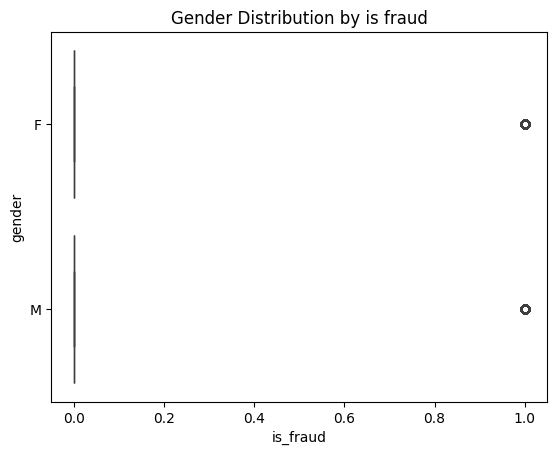

In [13]:
sns.boxplot(data=df, x="is_fraud", y="gender")
plt.title("Gender Distribution by is fraud")

In [14]:
#Since we delete unique features, there may be duplicate rows
df.drop_duplicates(keep="first", inplace=True)

In [15]:
df.shape

(1296187, 17)

In [16]:
#We also don't need first and second, and other atribbutes
df.drop(["first", "last", "cc_num", "lat", "long", "zip"], axis=1, inplace=True)

In [17]:
#test
df.drop(["merchant"], axis=1, inplace=True)
df.drop(["street"], axis=1, inplace=True)

In [18]:
df.drop_duplicates(keep="first", inplace=True)
df.shape

(1272789, 9)

In [19]:
from datetime import datetime
#transform date of birth to Age
df['dob'] = pd.to_datetime(df['dob'])
current_date = datetime.now()
df['age'] = df['dob'].apply(lambda dob: current_date.year - dob.year - ((current_date.month, current_date.day) < (dob.month, dob.day)))


In [20]:
df.drop(["dob"], axis=1, inplace=True)

In [21]:
df

,category,amt,gender,city,state,city_pop,job,is_fraud,age
0,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,36
1,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,46
2,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,62
3,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,57
4,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,38
...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,Hatch,UT,258,Geoscientist,0,62
1296671,food_dining,51.70,M,Tuscarora,MD,100,"Production assistant, television",0,44
1296672,food_dining,105.93,M,High Rolls Mountain Park,NM,899,Naval architect,0,57
1296673,food_dining,74.90,M,Manderson,SD,1126,Volunteer coordinator,0,44


In [22]:
df.isna().sum()

,0
category,0
amt,0
gender,0
city,0
state,0
city_pop,0
job,0
is_fraud,0
age,0


In [23]:
#contar cada atributo

df.nunique()

,0
category,14
amt,52928
gender,2
city,894
state,51
city_pop,879
job,494
is_fraud,2
age,81


In [24]:
df = pd.get_dummies(df, columns=["gender"])

In [25]:
#df["AmtAgeRatio"] = df["amt"]/df["age"]

In [26]:
df

,category,amt,city,state,city_pop,job,is_fraud,age,gender_F,gender_M
0,misc_net,4.97,Moravian Falls,NC,3495,"Psychologist, counselling",0,36,True,False
1,grocery_pos,107.23,Orient,WA,149,Special educational needs teacher,0,46,True,False
2,entertainment,220.11,Malad City,ID,4154,Nature conservation officer,0,62,False,True
3,gas_transport,45.00,Boulder,MT,1939,Patent attorney,0,57,False,True
4,misc_pos,41.96,Doe Hill,VA,99,Dance movement psychotherapist,0,38,False,True
...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,Hatch,UT,258,Geoscientist,0,62,False,True
1296671,food_dining,51.70,Tuscarora,MD,100,"Production assistant, television",0,44,False,True
1296672,food_dining,105.93,High Rolls Mountain Park,NM,899,Naval architect,0,57,False,True
1296673,food_dining,74.90,Manderson,SD,1126,Volunteer coordinator,0,44,False,True


In [27]:
df.dtypes

,0
category,object
amt,float64
city,object
state,object
city_pop,int64
job,object
is_fraud,int64
age,int64
gender_F,bool
gender_M,bool


In [28]:
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in df:
  #Determinamos si la columna (variable) es numérica o no
  if pd.api.types.is_numeric_dtype(df[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la columna (variable) mediante "astype"
    df[column] = df[column].astype("category")

    #Verificamos si el tipo de dato de la columna (variable) fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(df[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()

    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la columna (variable) y guardamos esa información en los diccionarios
    for index, category in enumerate(df[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index

    categorical_columns.append(column)

<ipython-input-28-e8c028113f91>:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[column]):
<ipython-input-28-e8c028113f91>:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[column]):
<ipython-input-28-e8c028113f91>:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[column]):
<ipython-input-28-e8c028113f91>:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[column]):


In [29]:
numeric_columns

['amt', 'city_pop', 'is_fraud', 'age', 'gender_F', 'gender_M']

In [30]:
categorical_columns

['category', 'city', 'state', 'job']

In [31]:
dictionary_of_columns_with_index_to_categorical.keys()

dict_keys(['category', 'city', 'state', 'job'])

In [32]:
dictionary_of_columns_with_index_to_categorical["category"]

{0: 'entertainment',
 1: 'food_dining',
 2: 'gas_transport',
 3: 'grocery_net',
 4: 'grocery_pos',
 5: 'health_fitness',
 6: 'home',
 7: 'kids_pets',
 8: 'misc_net',
 9: 'misc_pos',
 10: 'personal_care',
 11: 'shopping_net',
 12: 'shopping_pos',
 13: 'travel'}

In [33]:
set(df["category"])

{'entertainment',
 'food_dining',
 'gas_transport',
 'grocery_net',
 'grocery_pos',
 'health_fitness',
 'home',
 'kids_pets',
 'misc_net',
 'misc_pos',
 'personal_care',
 'shopping_net',
 'shopping_pos',
 'travel'}

In [34]:
df.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

<ipython-input-34-41bffc4c6541>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)
<ipython-input-34-41bffc4c6541>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)
<ipython-input-34-41bffc4c6541>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future 

In [35]:
df

,category,amt,city,state,city_pop,job,is_fraud,age,gender_F,gender_M
0,8,4.97,526,27,3495,370,0,36,True,False
1,4,107.23,612,47,149,428,0,46,True,False
2,0,220.11,468,13,4154,307,0,62,False,True
3,2,45.00,84,26,1939,328,0,57,False,True
4,9,41.96,216,45,99,116,0,38,False,True
...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,330,44,258,215,0,62,False,True
1296671,1,51.70,813,20,100,360,0,44,False,True
1296672,1,105.93,346,32,899,308,0,57,False,True
1296673,1,74.90,471,41,1126,485,0,44,False,True


In [36]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of fraud transactions')

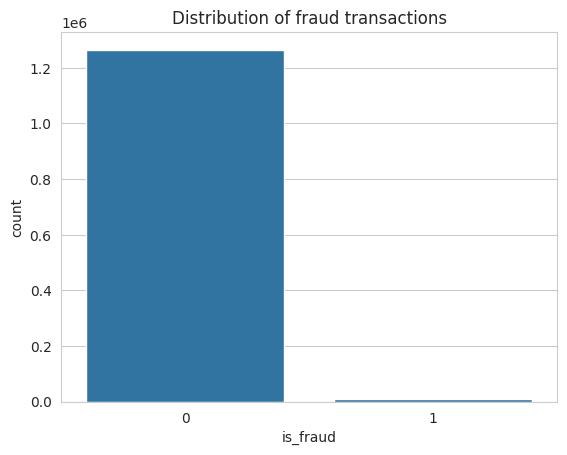

In [37]:
sns.countplot(data=df, x="is_fraud")
plt.title("Distribution of fraud transactions")

In [38]:
#count isFraud true
df["is_fraud"].value_counts()

,count
is_fraud,
0,1265284
1,7505


In [39]:
#df["gender_M"].value_counts()

Text(0.5, 1.0, 'Age Distribution')

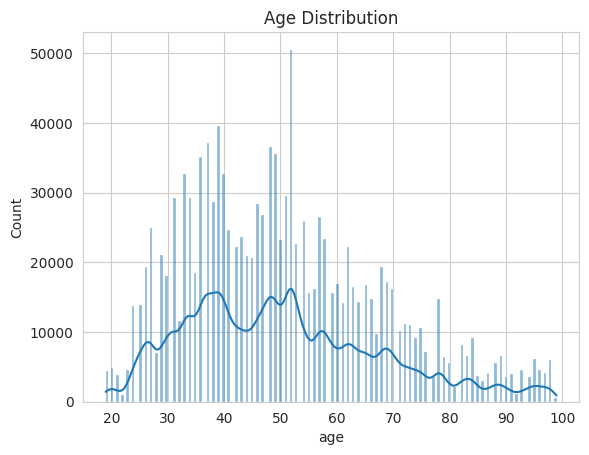

In [40]:
sns.histplot(data=df, x="age", kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'amt vs. Age')

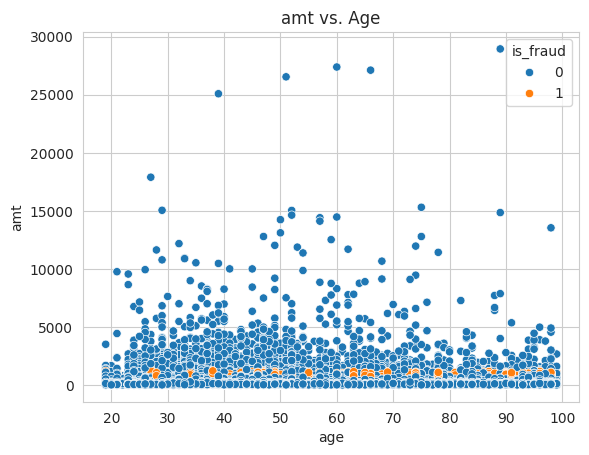

In [41]:
sns.scatterplot(data=df, x="age", y="amt", hue="is_fraud")
plt.title("amt vs. Age")

Text(0.5, 1.0, 'amt distribution by Fraud')

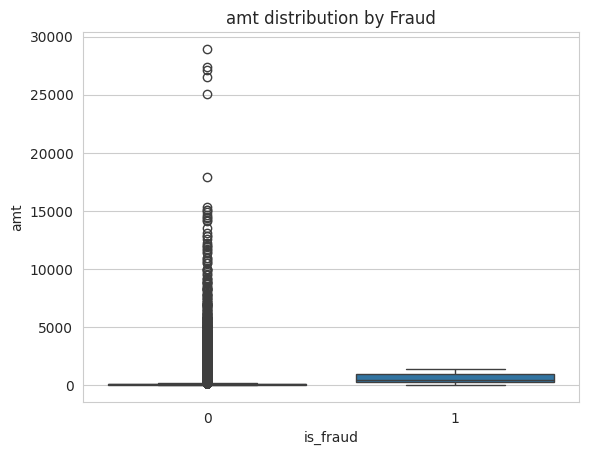

In [42]:
sns.boxplot(data=df, x="is_fraud", y="amt")
plt.title("amt distribution by Fraud")

We can see that there are some outliers from amt, but let's wait to see if it impact in the model precision

In [43]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
#divide feature from target
target = df["is_fraud"]
df.drop(["is_fraud"], axis=1, inplace=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#probar despues:
#from imblearn.under_sampling import RandomUnderSampler

# Inicializamos el submuestreador
#under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Aplicamos el submuestreo a los datos
#X_resampled, y_resampled = under_sampler.fit_resample(X, y)


In [48]:
X_train[0]

array([ 0.20528535,  0.22841134, -1.36641824, -0.18557239, -0.29216757,
        0.72010921,  0.19284938, -1.10014611,  1.10014611])

In [49]:
X_train[1]

array([-1.58774731,  0.13555927, -0.82881874, -1.44147119, -0.29268933,
       -1.06413594, -0.78412889,  0.90897017, -0.90897017])

#Train Machine Learning Models

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [51]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [52]:
lr_predictions = lr_model.predict(X_test)

In [53]:
lr_accuracy = accuracy_score(y_test, lr_predictions)


In [54]:
lr_accuracy

0.9936085292939134

In [55]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  print(f"{model.__class__.__name__} Accuracy: {accuracy}")
  print(f"\n Classification Report:\n {classification_report(y_test, predictions)}")
  print("==============")
  with open(filename, 'wb') as file:
    pickle.dump(model,file)
  print(f"Model saved as {filename}")

In [56]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test,"xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test,"dt_model.pkl" )

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test,"rf_model.pkl" )

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test,"nb_model.pkl" )

kn_model = KNeighborsClassifier()
evaluate_and_save_model(kn_model, X_train, X_test, y_train, y_test,"kn_model.pkl" )

#svm_model = SVC(random_state=42)
#evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test,"svm_model.pkl" )

XGBClassifier Accuracy: 0.9971597828392743

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.84      0.63      0.72      1488

    accuracy                           1.00    254558
   macro avg       0.92      0.82      0.86    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.9960755505621509

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.66      0.68      0.67      1488

    accuracy                           1.00    254558
   macro avg       0.83      0.84      0.83    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as dt_model.pkl
RandomForestClassifier Accuracy: 0.9972894193071913

 Classification Report:
               precision    recall  f1-score   support

         

In [57]:
feature_importances= xgb_model.feature_importances_
feature_names = df.columns

In [58]:
feature_importances

array([0.32638258, 0.36155924, 0.0263347 , 0.02387058, 0.04593305,
       0.02805237, 0.06377653, 0.12409095, 0.        ], dtype=float32)

In [59]:
feature_names

Index(['category', 'amt', 'city', 'state', 'city_pop', 'job', 'age',
       'gender_F', 'gender_M'],
      dtype='object')

In [60]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [61]:
feature_importances_df

,Feature,Importance
0,category,0.326383
1,amt,0.361559
2,city,0.026335
3,state,0.023871
4,city_pop,0.045933
5,job,0.028052
6,age,0.063777
7,gender_F,0.124091
8,gender_M,0.000000


In [62]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [63]:
feature_importances_df

,Feature,Importance
1,amt,0.361559
0,category,0.326383
7,gender_F,0.124091
6,age,0.063777
4,city_pop,0.045933
5,job,0.028052
2,city,0.026335
3,state,0.023871
8,gender_M,0.000000


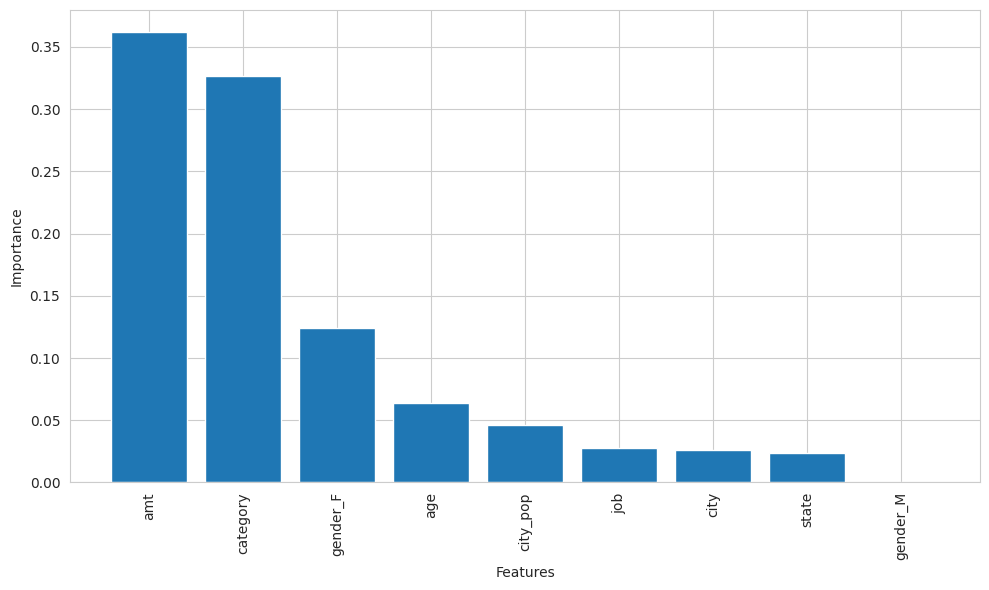

In [64]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df["Feature"], feature_importances_df["Importance"])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [65]:
print(feature_importances_df)

    Feature  Importance
1       amt    0.361559
0  category    0.326383
7  gender_F    0.124091
6       age    0.063777
4  city_pop    0.045933
5       job    0.028052
2      city    0.026335
3     state    0.023871
8  gender_M    0.000000


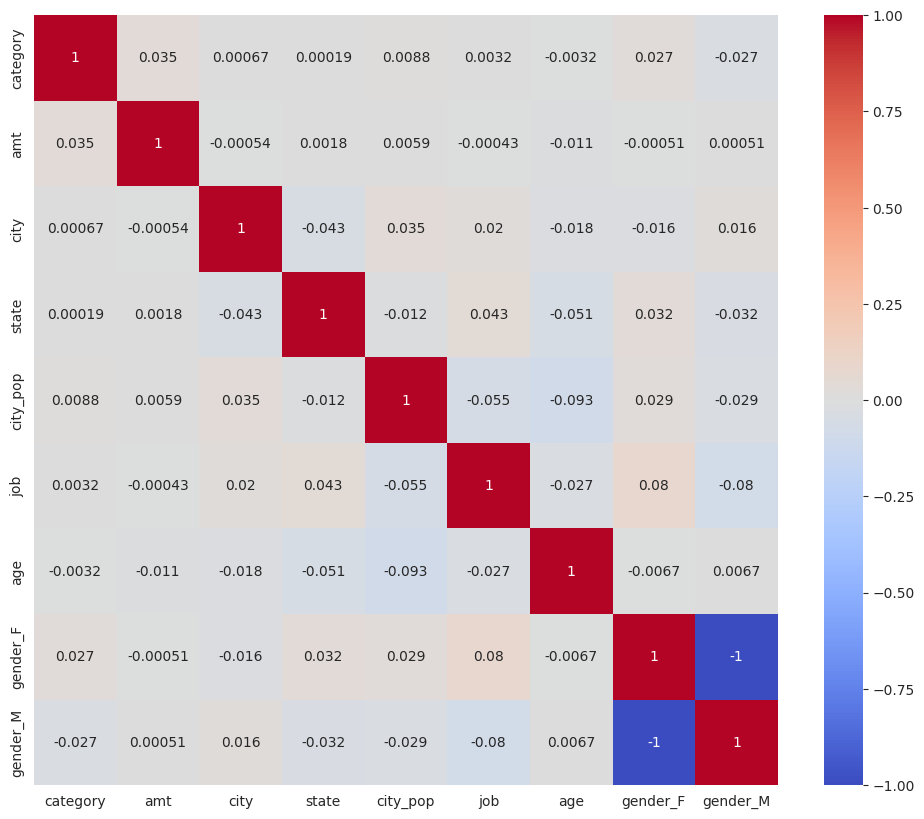

In [66]:
#correlation map
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

#Improving Accuracy

In [67]:
df["AmtAgeRatio"] = df["amt"]/df["age"]

In [68]:
df

,category,amt,city,state,city_pop,job,age,gender_F,gender_M,AmtAgeRatio
0,8,4.97,526,27,3495,370,36,True,False,0.138056
1,4,107.23,612,47,149,428,46,True,False,2.331087
2,0,220.11,468,13,4154,307,62,False,True,3.550161
3,2,45.00,84,26,1939,328,57,False,True,0.789474
4,9,41.96,216,45,99,116,38,False,True,1.104211
...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,330,44,258,215,62,False,True,0.250968
1296671,1,51.70,813,20,100,360,44,False,True,1.175000
1296672,1,105.93,346,32,899,308,57,False,True,1.858421
1296673,1,74.90,471,41,1126,485,44,False,True,1.702273


In [69]:
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test,"xgboost-feature-eng_model.pkl")

XGBClassifier Accuracy: 0.9971597828392743

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.84      0.63      0.72      1488

    accuracy                           1.00    254558
   macro avg       0.92      0.82      0.86    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as xgboost-feature-eng_model.pkl


In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smote = SMOTE(random_state=42)

In [72]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [73]:
xgboost_model = xgb.XGBClassifier(random_state=42)


In [74]:
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9905286810864322

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    253070
           1       0.37      0.90      0.53      1488

    accuracy                           0.99    254558
   macro avg       0.69      0.95      0.76    254558
weighted avg       1.00      0.99      0.99    254558

Model saved as xgboost-SMOTE.pkl


In [75]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [76]:
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

In [77]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)

# Aplicamos el sobremuestreo a los datos submuestreados
X_resampled_final, y_resampled_final = smote.fit_resample(X_resampled, y_resampled)

In [78]:
evaluate_and_save_model(xgb_model, X_resampled_final, X_test, y_resampled_final, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9727252728258393

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    253070
           1       0.17      0.95      0.29      1488

    accuracy                           0.97    254558
   macro avg       0.59      0.96      0.64    254558
weighted avg       0.99      0.97      0.98    254558

Model saved as xgboost-SMOTE.pkl


In [79]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)

In [80]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [81]:
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.994386348101415

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.51      0.86      0.64      1488

    accuracy                           0.99    254558
   macro avg       0.76      0.93      0.82    254558
weighted avg       1.00      0.99      1.00    254558

Model saved as xgboost-SMOTE.pkl


In [88]:
smote = SMOTE(sampling_strategy=0.05, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9969240801703345

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.71      0.79      0.75      1488

    accuracy                           1.00    254558
   macro avg       0.86      0.89      0.87    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as xgboost-SMOTE.pkl


In [89]:
smote = SMOTE(sampling_strategy=0.05, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.5, max_depth=7 )
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.997140140950196

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.75      0.77      0.76      1488

    accuracy                           1.00    254558
   macro avg       0.87      0.88      0.88    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as xgboost-SMOTE.pkl


In [87]:
smote = SMOTE(sampling_strategy=0.05, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.98, max_depth=5 )
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9949323926177924

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.55      0.75      0.63      1488

    accuracy                           0.99    254558
   macro avg       0.77      0.87      0.82    254558
weighted avg       1.00      0.99      1.00    254558

Model saved as xgboost-SMOTE.pkl


In [83]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_resampled, X_test, y_resampled, y_test, "dt-SMOTE.pkl")

DecisionTreeClassifier Accuracy: 0.9956630708915061

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.61      0.71      0.66      1488

    accuracy                           1.00    254558
   macro avg       0.80      0.85      0.83    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as dt-SMOTE.pkl


In [84]:
kn_model = KNeighborsClassifier()
evaluate_and_save_model(kn_model, X_resampled, X_test, y_resampled, y_test, "kn-SMOTE.pkl")

KNeighborsClassifier Accuracy: 0.9949166791065297

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.55      0.72      0.62      1488

    accuracy                           0.99    254558
   macro avg       0.77      0.86      0.81    254558
weighted avg       1.00      0.99      1.00    254558

Model saved as kn-SMOTE.pkl


In [85]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_resampled, X_test, y_resampled, y_test, "rf-SMOTE.pkl")

RandomForestClassifier Accuracy: 0.9969280085481501

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.73      0.74      0.74      1488

    accuracy                           1.00    254558
   macro avg       0.87      0.87      0.87    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as rf-SMOTE.pkl


In [90]:
smote = SMOTE(sampling_strategy=0.7, random_state=42)

In [92]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9921236024795921

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    253070
           1       0.42      0.89      0.57      1488

    accuracy                           0.99    254558
   macro avg       0.71      0.94      0.78    254558
weighted avg       1.00      0.99      0.99    254558

Model saved as xgboost-SMOTE.pkl


In [91]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.98, max_depth=5 )
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9923750186597946

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    253070
           1       0.42      0.84      0.56      1488

    accuracy                           0.99    254558
   macro avg       0.71      0.92      0.78    254558
weighted avg       1.00      0.99      0.99    254558

Model saved as xgboost-SMOTE.pkl


In [112]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.98, max_depth=7 )
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9952348777095986

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    253070
           1       0.57      0.80      0.66      1488

    accuracy                           1.00    254558
   macro avg       0.78      0.90      0.83    254558
weighted avg       1.00      1.00      1.00    254558

Model saved as xgboost-SMOTE.pkl


In [96]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.98, max_depth=5 )
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.991550059318505

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    253070
           1       0.40      0.86      0.54      1488

    accuracy                           0.99    254558
   macro avg       0.70      0.93      0.77    254558
weighted avg       1.00      0.99      0.99    254558

Model saved as xgboost-SMOTE.pkl


In [97]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9905286810864322

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    253070
           1       0.37      0.90      0.53      1488

    accuracy                           0.99    254558
   macro avg       0.69      0.95      0.76    254558
weighted avg       1.00      0.99      0.99    254558

Model saved as xgboost-SMOTE.pkl


In [110]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [111]:
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.9881677260192177

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    253070
           1       0.32      0.92      0.48      1488

    accuracy                           0.99    254558
   macro avg       0.66      0.95      0.74    254558
weighted avg       1.00      0.99      0.99    254558

Model saved as xgboost-SMOTE.pkl


In [86]:
#svm_model = SVC(random_state=42, C=0.5)
#evaluate_and_save_model(svm_model, X_resampled, X_test, y_resampled, y_test, "svm-SMOTE-prob.pkl")